In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import TimeSeriesSplit
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv('../data/MPS/agg_filtered_boroughs_weekends.csv')

In [4]:
df.head()

,BoroughName,CrimeType,CrimeSubtype,TimePeriod,Value,WorkingDays,Weekends
0,Barking and Dagenham,Arson and Criminal Damage,Arson,2010-04-01,6,20,10
1,Barking and Dagenham,Arson and Criminal Damage,Criminal Damage,2010-04-01,208,20,10
2,Barking and Dagenham,Burglary,Burglary Business and Community,2010-04-01,49,20,10
3,Barking and Dagenham,Burglary,Domestic Burglary,2010-04-01,118,20,10
4,Barking and Dagenham,Drug Offences,Drug Trafficking,2010-04-01,9,20,10


In [16]:
# Преобразуем колонку 'month' в формат datetime
df['TimePeriod'] = pd.to_datetime(df['TimePeriod'])

df['year'] = df['TimePeriod'].dt.year
df['month'] = df['TimePeriod'].dt.month

# Сортируем данные по дате
df = df.sort_values('TimePeriod')

# Создаем one-hot encoder
encoder = OneHotEncoder(sparse=False)

# Применяем one-hot encoding к колонкам 'borough', 'crimetype', 'crimesubtype'
encoded_features = encoder.fit_transform(df[['BoroughName', 'CrimeType', 'CrimeSubtype']])

# Сохраняем список боро и видов преступлений
boroughs = df['BoroughName'].unique()
crime_types = df['CrimeSubtype'].unique()

# Добавляем закодированные признаки в датасет
df_encoded = pd.concat([df, pd.DataFrame(encoded_features)], axis=1)

# Удаляем исходные колонки
df_encoded = df_encoded.drop(['BoroughName', 'CrimeType', 'CrimeSubtype', 'TimePeriod'], axis=1)

df_encoded.columns = df_encoded.columns.astype(str)


/home/roman/edu/neighbourhood-safety-prediction/venv/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


# Train model

In [17]:
df_encoded.head()

,Value,WorkingDays,Weekends,month,year,0,1,2,3,4,...,90,91,92,93,94,95,96,97,98,99
0,6,20,10,4,2010,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1116,0,20,10,4,2010,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
839,60,20,10,4,2010,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1125,3,20,10,4,2010,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1124,0,20,10,4,2010,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [18]:
# Создаем модель линейной регрессии
model = LinearRegression()

# Создаем объект TimeSeriesSplit для кросс-валидации
tscv = TimeSeriesSplit(n_splits=5)

# Разделяем данные на признаки и целевую переменную
X = df_encoded.drop('Value', axis=1)
y = df_encoded['Value']

# Проходимся по всем фолдам и обучаем модель
for train_index, test_index in tscv.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    model.fit(X_train, y_train)
    
    # Делаем предсказания и выводим ошибку
    predictions = model.predict(X_test)
    print('RMSE:', np.sqrt(mean_squared_error(y_test, predictions)))

RMSE: 71.80900150666707
RMSE: 71.37406041799889
RMSE: 79.90936880570226
RMSE: 86.50723349504912
RMSE: 104.64594151431879


In [50]:
df["predictions_lm"] = model.predict(X)

In [21]:
# Создаем модель линейной регрессии
model_rf = RandomForestRegressor(

# Создаем объект TimeSeriesSplit для кросс-валидации
tscv = TimeSeriesSplit(n_splits=5)

# Разделяем данные на признаки и целевую переменную
X = df_encoded.drop('Value', axis=1)
y = df_encoded['Value']

# Проходимся по всем фолдам и обучаем модель
for train_index, test_index in tscv.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    model_rf.fit(X_train, y_train)
    
    # Делаем предсказания и выводим ошибку
    predictions = model_rf.predict(X_test)
    print('RMSE:', np.sqrt(mean_squared_error(y_test, predictions)))

RMSE: 77.40948917562696
RMSE: 71.33211932863028
RMSE: 79.68763150583167
RMSE: 90.59380283532437
RMSE: 114.33733759690979


In [47]:

df["predictions"] = model_rf.predict(X)

# Смотрим ряды по району и типу преступления

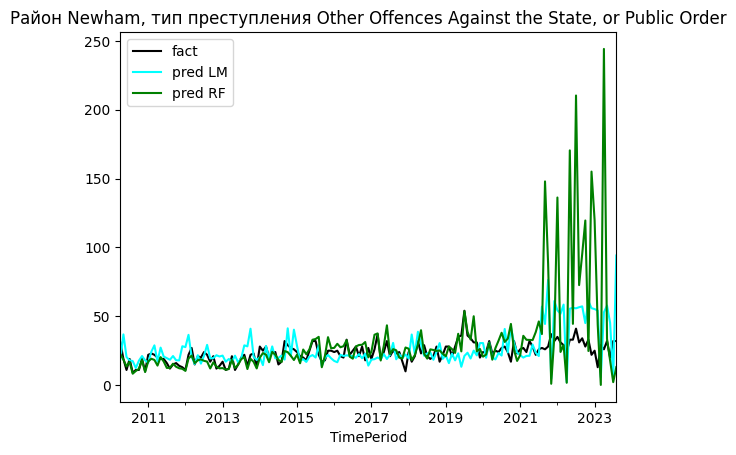

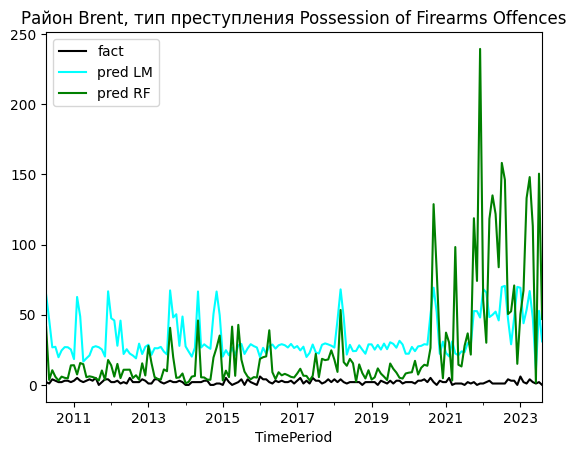

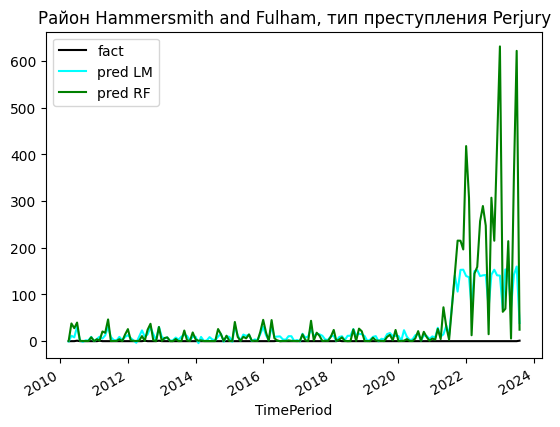

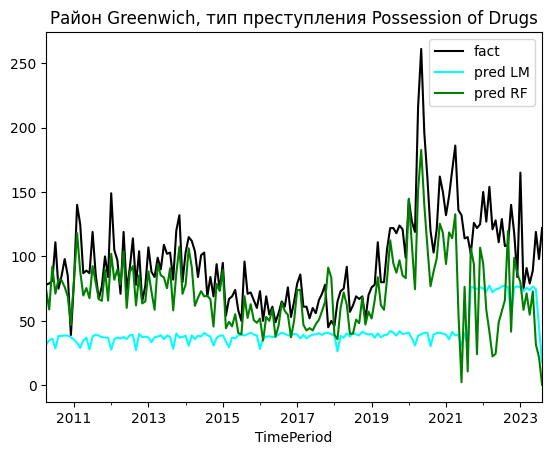

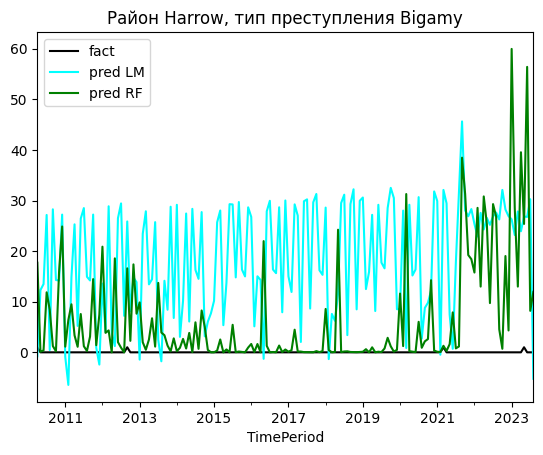

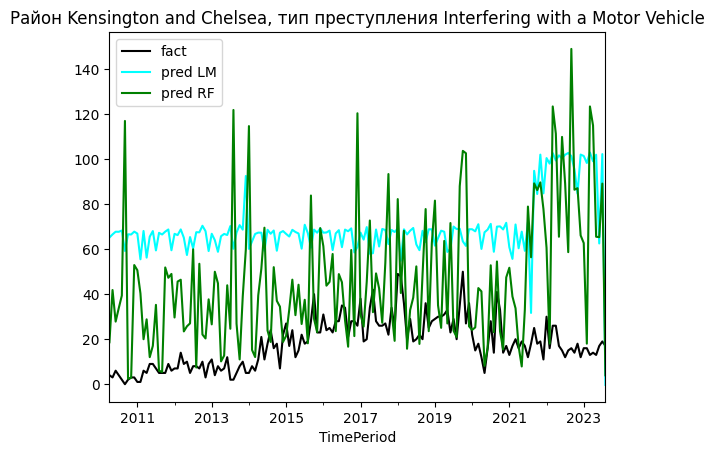

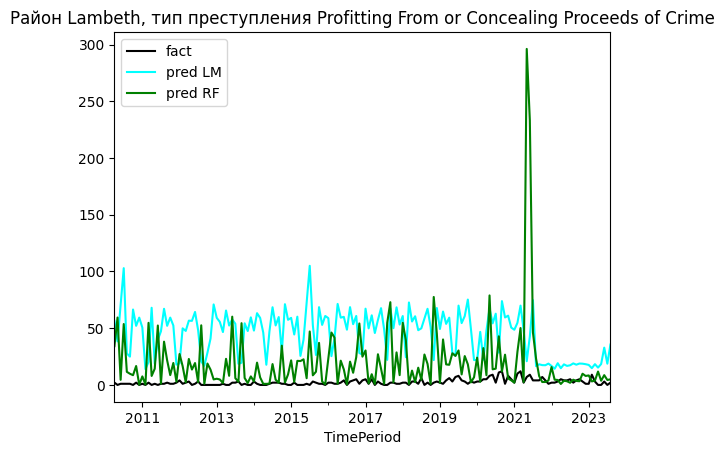

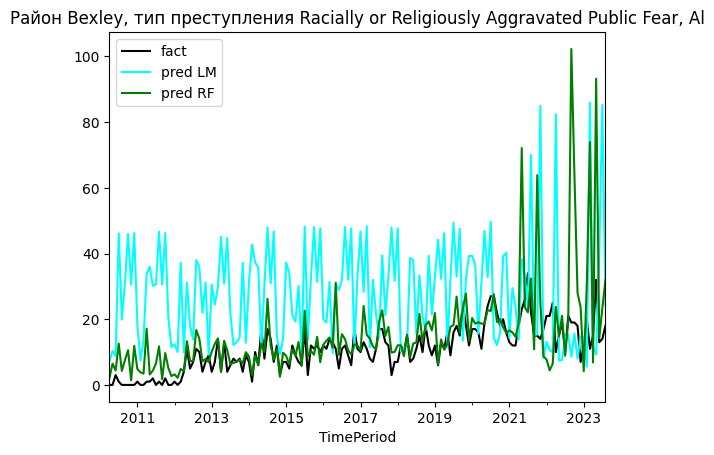

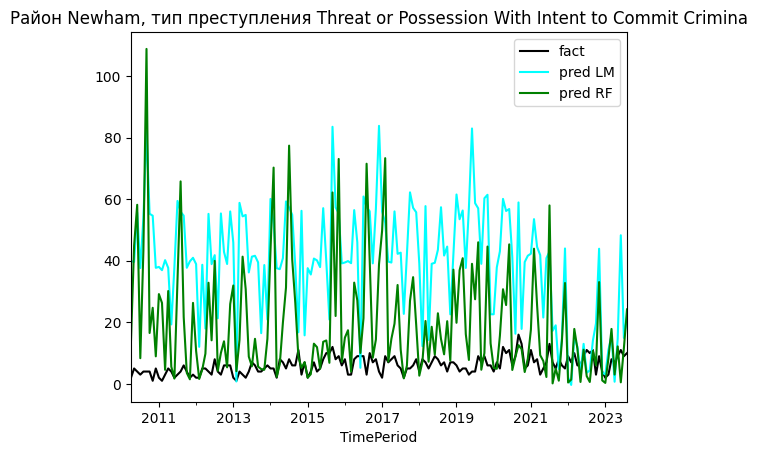

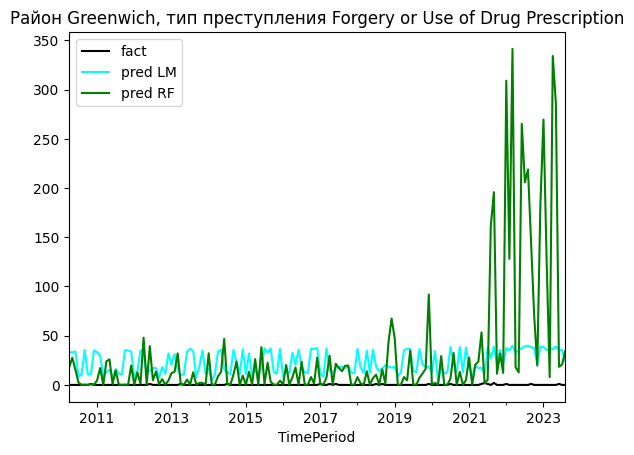

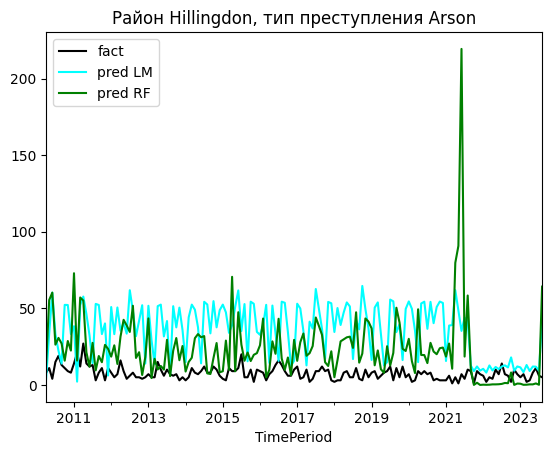

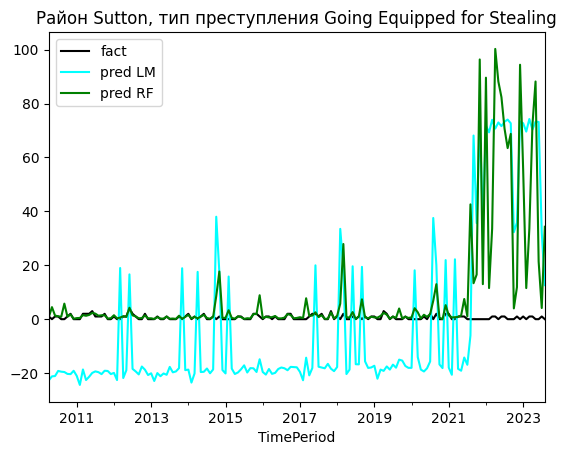

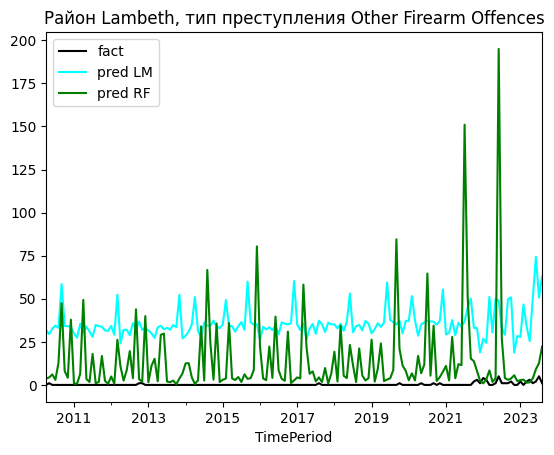

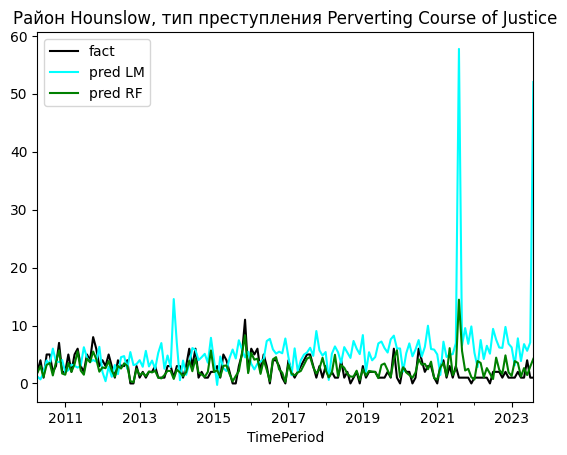

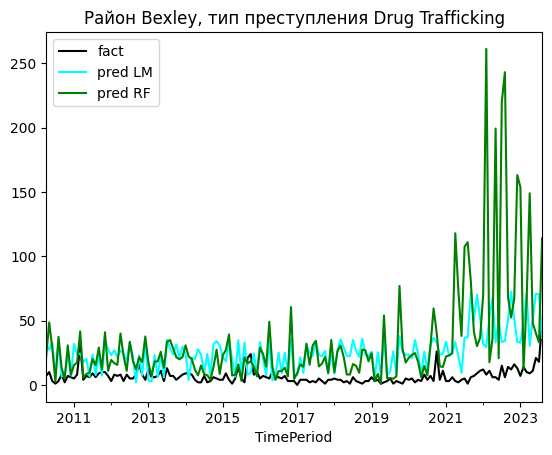

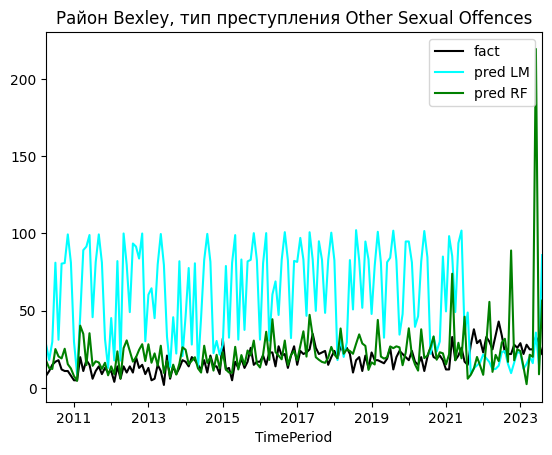

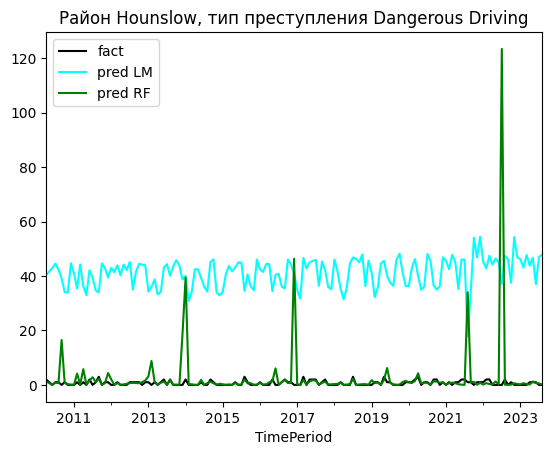

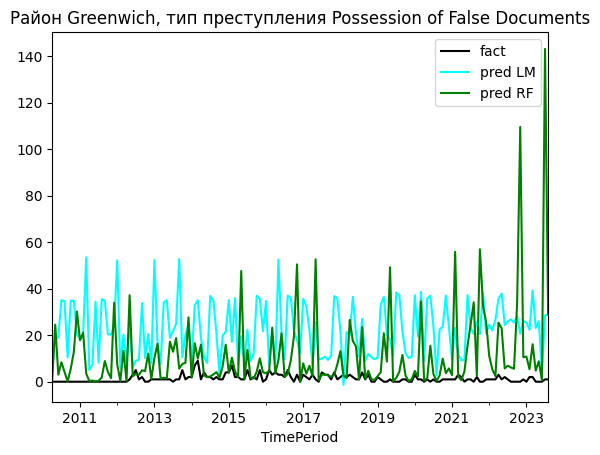

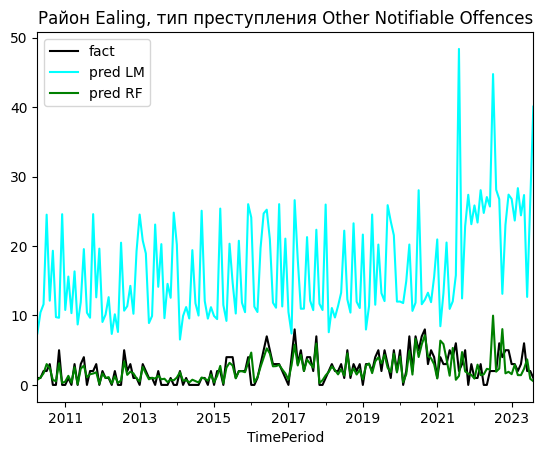

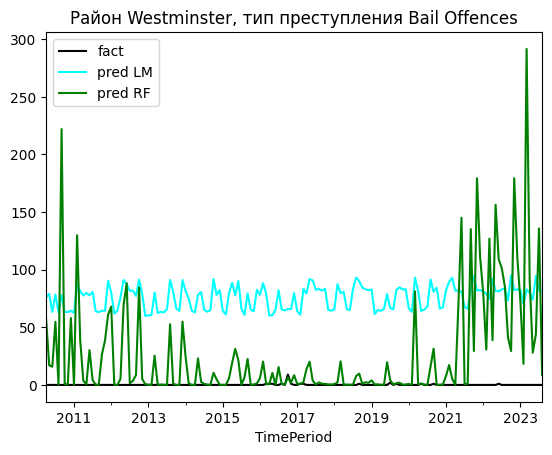

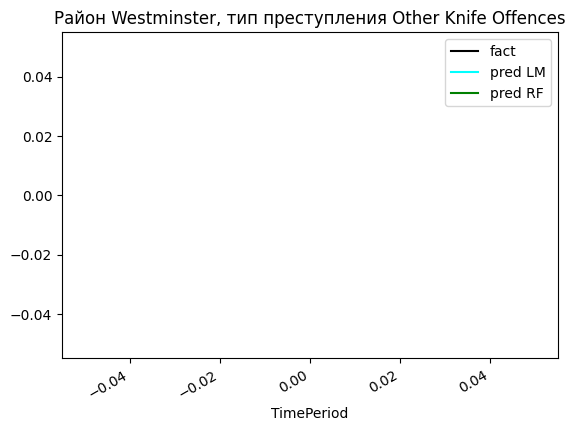

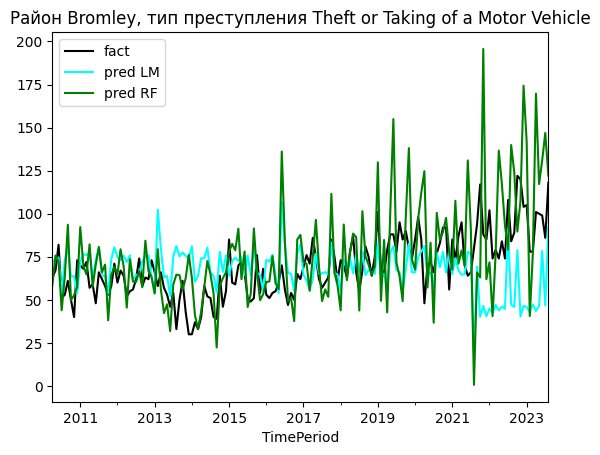

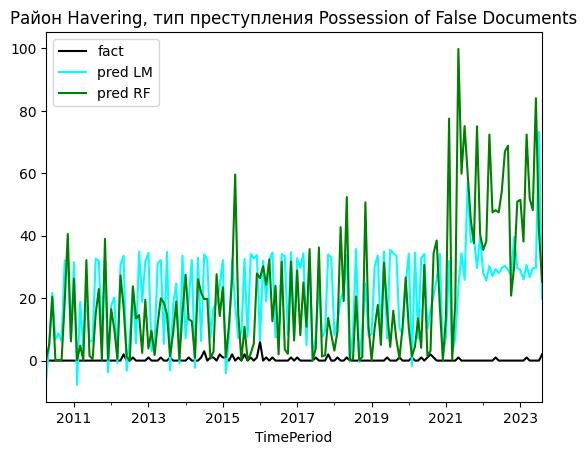

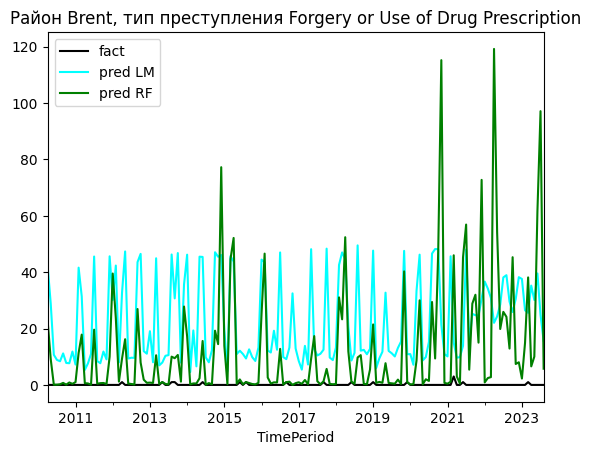

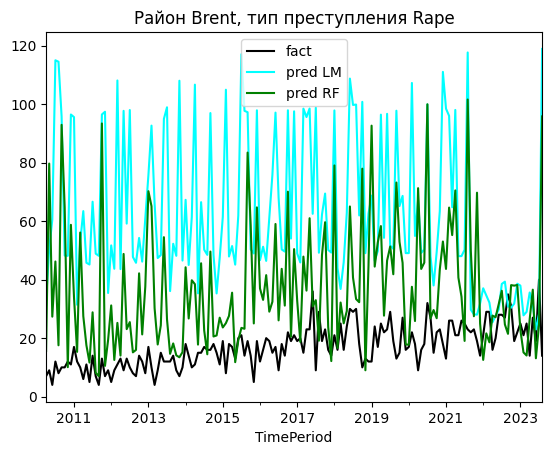

In [53]:
for _ in range(25):
    random_borough = np.random.choice(df['BoroughName'])
    random_crime = np.random.choice(df['CrimeSubtype'])
    
    filtered_df = df[(df['BoroughName'] == random_borough) & (df['CrimeSubtype'] == random_crime)]
    filtered_df.set_index('TimePeriod', inplace=True)
    plt.figure()
    filtered_df["Value"].plot(color="black", label="fact")
    filtered_df["predictions_lm"].plot(color="cyan", label="pred LM")
    filtered_df["predictions"].plot(color="green", label="pred RF")
    plt.title(f"Район {random_borough}, тип преступления {random_crime}");
    plt.legend()
    plt.show();